In [1]:
import pandas as pd
from utils_analysis import prepare_scores, plot_correlation
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
df = pd.read_csv("data/squad/test.csv")

# "results/bart/r1/bart-base_data_squad_checkpoint-26280_squad.json",
# "results/bart/r2/bart-base_data_squad_checkpoint-26280_squad.json",
# "results/bart/r3/bart-base_data_squad_checkpoint-26280_squad.json",
# "results/t5/r1/flan-t5-base_data_squad_checkpoint-26280_squad.json",
# "results/t5/r2/flan-t5-base_data_squad_checkpoint-26280_squad.json",
# "results/t5/r3/flan-t5-base_data_squad_checkpoint-26280_squad.json",

df_scores, beam_search_results = prepare_scores(
    "results/bart/r3/bart-base_data_squad_checkpoint-26280_squad.json",
    df["target"],
    "f1",
)

/home/mila/f/floresl/beam-search/utils_analysis.py:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  abs(spearmanr(ground_truth_score, confidence_score_dict[str(k)]).statistic)  # type: ignore


In [28]:
df_scores.drop(["sentences", "dropout_sentences"], axis=1).corr(method="spearman")["f1"]

length_normalized_log_probs    0.557568
mean_token_entropy            -0.058177
dropout_bleu_variance         -0.221837
dropout_meteor_score           0.376092
dropout_entropy               -0.440237
dropout_disagreement          -0.486858
f1                             1.000000
beam_score_ratios_36           0.523396
beam_score_log_probs_36       -0.186909
beam_score_top_k_36           -0.181422
beam_score_impt_wt_36          0.176438
Name: f1, dtype: float64

In [29]:
beam_score_log_probs = pd.DataFrame(beam_search_results["beam_score_log_probs"])
worst_rouge_idxs = df_scores.sort_values(by="f1").index[:100]
best_rouge_idxs = df_scores.sort_values(by="f1").index[::-1][:100]

In [30]:
from utils_analysis import plot_sequence_probs
from utils_tail_probs import softmax

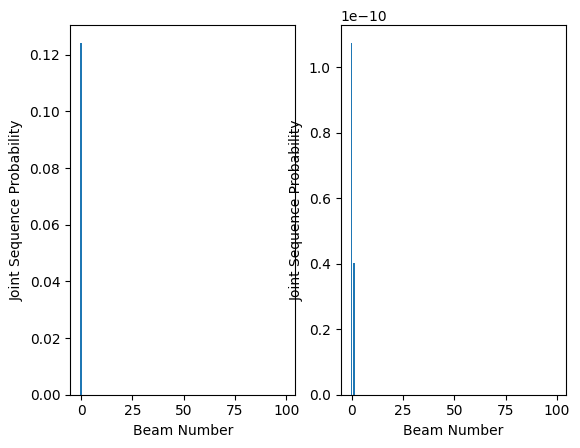

In [31]:
i = 10
plot_sequence_probs(
    beam_score_log_probs.iloc[best_rouge_idxs[i]],
    beam_score_log_probs.iloc[worst_rouge_idxs[i]],
    seq_len=200,
)

In [32]:
from utils_tail_probs import softmax, tail_index
from scipy.stats import spearmanr

In [47]:
tail_indices = []
for i in range(len(beam_score_log_probs)):
    probs = softmax(200 * beam_score_log_probs.iloc[i].to_numpy(), temperature=1)
    tail_indices.append(tail_index(probs))

spearmanr(tail_indices, df_scores["f1"])

SignificanceResult(statistic=0.5177262777826122, pvalue=1.164198494245449e-69)